<a href="https://colab.research.google.com/github/divya-shree1125/Divya_Meta_scifor_technology/blob/main/mini_project_2/email_spam_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('mail_data.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# **Data cleaning**

removing the null values

In [5]:
data=df.where(pd.notnull(df),'')

In [6]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.shape

(5572, 2)

In [42]:
#seeing duplicate
data.duplicated().sum()

0

In [43]:
#removing duplicate
data.drop_duplicates(inplace=True)
data.shape

(5157, 3)

converting 'ham' into 0 and 'spam' into 1

In [11]:
data.replace({'ham': 0 , 'spam': 1} , inplace=True)
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# **EDA**

In [44]:
data['Category'].value_counts()

,count
Category,
0,4516
1,641


In [45]:
x=data['Message']
y=data['Category']

<Axes: xlabel='Category', ylabel='count'>

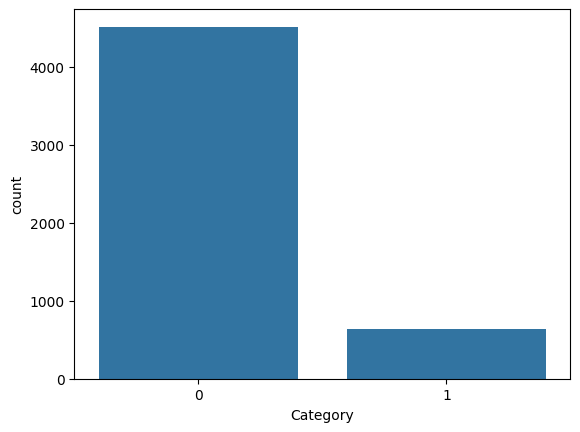

In [46]:
sns.countplot(x=y)

# **Visualization of the data**

In [33]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
#counting number of words from the each message
data['num_words'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,Category,Message,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


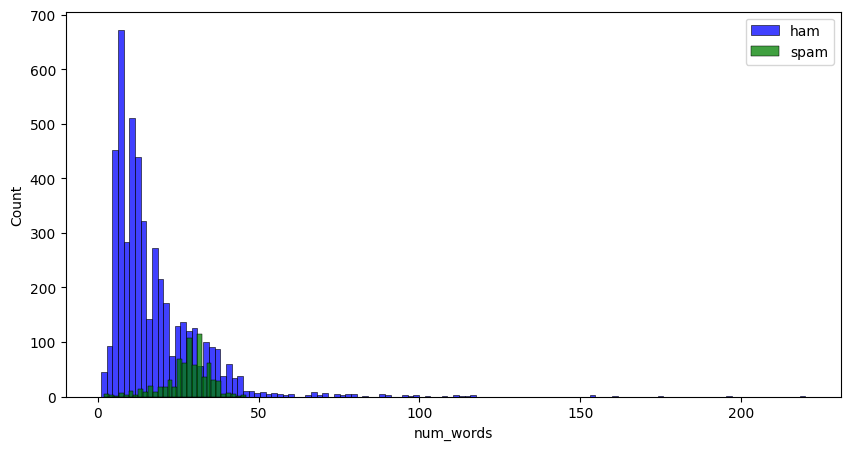

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Category"]==0]['num_words'],color="b")
sns.histplot(df[df["Category"]==1]['num_words'],color="g")
plt.legend(["ham","spam"])
plt.show()

here is the histogram visualization

the diagram show the number of 'ham' email words is larger then the spam email words.

**using a word cloud to visually identify the most frequently used words in both ham and spam emails message.**

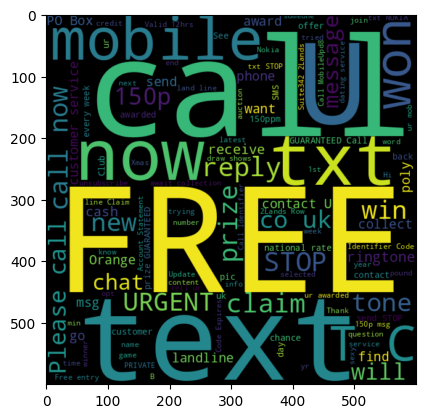

In [38]:
from wordcloud import WordCloud
wc= WordCloud(width=600,height=600,min_font_size=10,background_color="black")

spam=wc.generate(data[data['Category']==1]['Message'].str.cat(sep=" "))

plt.figure()
plt.imshow(spam,interpolation='bilinear')

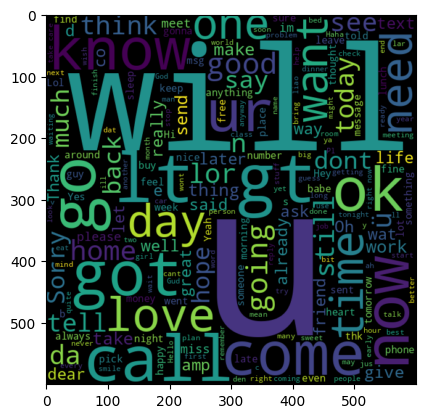

In [39]:
ham=wc.generate(df[df['Category']==0]['Message'].str.cat(sep=""))
plt.figure()
plt.imshow(ham,interpolation='bilinear')

# **Model Building**

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
lr=LogisticRegression()
lr.fit(x_train_feature,y_train)

LogisticRegression()

In [24]:
pred=lr.predict(x_test_feature)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9668161434977578
[[960   0]
 [ 37 118]]
1.0


For model selection, I evaluated logistic regression is the best model because it achieved a precision of 1, resulting in 0 false positives. the goal is to avoid misclassifying any ham emails as spam.

# **writing  the fuction to see whether the message is 'ham' or 'spam'by the prediction output**

In [29]:
def predictmessage(massage):
  data=feature_extraction.transform([massage]).toarray()
  prediction=lr.predict(data)
  return 'spam' if prediction[0] == 1 else 'ham'

usermessage=input('enter text to predict:')
predict=predictmessage(usermessage)
print(f'the message is {predict}')
#Oh k...i'm watching here:)

enter text to predict:Oh k...i'm watching here:)
the message is ham
